# Dataloop test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Probability 

### Q1. Craps 

1. For each number between 2 and 12, what is the probability of rolling the dice so that
they sum to that number?

**Answer:** We can make a loop which store the frequency at we get each number and the total number of events (all the combinations of the craps), the probability to get every number will their corresponding frequency divided by the total number of events. It is important have into account that one of the dice are unbalanced and we cannot get 1 or 6.

For this case, I will make a dictionary where the keys are the sum of the craps and the values are the probabilities to get them.

In [2]:
def prob():
    events = [0 for i in range(11)]
    for i in range(1,7):
        for j in range(2,6):
            events[i+j-2] += 1
    total_events = sum(events)
    return {i:events[i-2]/total_events for i in range(2,13)}

In [3]:
prob_craps = prob()

In [4]:
prob_craps

{2: 0.0,
 3: 0.041666666666666664,
 4: 0.08333333333333333,
 5: 0.125,
 6: 0.16666666666666666,
 7: 0.16666666666666666,
 8: 0.16666666666666666,
 9: 0.125,
 10: 0.08333333333333333,
 11: 0.041666666666666664,
 12: 0.0}

2.a What’s the probability of winning on the very first roll?

**Answer:** The rules say you will win at the first roll if you get 7 or 11, so the probability of wining will be the sum of getting these numbers:

In [5]:
prob_craps[7]+prob_craps[11]

0.20833333333333331

Which is aproximately 21%.

2.b What’s the probability of losing (“crapping out”) on the very first roll?

**Answer:** If you get 2,3 or 12 you lose, but, as one of the dice is unbalanced, we cannot get 2 or 12, so the probability of lose is equal to the probability of getting 3:

In [6]:
prob_craps[3]

0.041666666666666664

Which is almos 4.17%.

3. Suppose that on the first roll, you do not win or lose, but rather, you get the sum X,
which has roll probability p. Given that you have already made it to this point,
what’s your chance of winning going forward?

**Answer:** You have a probability _p_, because the rules say if you get _X_ again you win.

4. If you play the game of craps with these two dice, you will get one dollar if you
win, and lose one dollar if you lose, then what is the expected return for playing the
game?

**Answer:** Let's say _x_ is the quantity you win or loss at each roll. To find out what is the expected return for playing, it is necessary to calculate the expected value of _x_ ($E[x]$). At the first roll $E[x]$ is:

$$ E[x] = 1\times prob(7,11)-1\times prob(2,3 or 12) = prob(7)+prob(11)-prob(3)$$

So, this value is:

In [7]:
prob_craps[7]+prob_craps[11]-prob_craps[3]

0.16666666666666666

If we don't win or lose at the first roll, getting the number _n_ with probability _p_,  the expected return if we going foward is:

$$E[x] = 1\times prob(n) - 1\times prob(7) = p - prob(7)$$

As 6,7 and 8 are the numbers with the highest probability, if we have n = 6 or 8, $E[x]=0$, if we have a different number, $E[x]<0$. We will have the lowest expected return when we expect to get 5 or 9, obtaining: 

In [8]:
prob_craps[5]-prob_craps[7]

-0.04166666666666666

So, the highest expected return is obtained when we expect to gain at the first roll ($E[x] \approx 0.167$), and the lowest return is obtained when we expect to gain with 5 or 9 at the second roll ($E[x]\approx -0.042$).

Thus, as we increase the number of games we'll see the expected return will oscilate between 0.167 y -0.042.

To verify this, I will simulate what happen for different number of games, then calculate the mean an plot it, all this in order to see what will be the expected return.

In [9]:
# function that simulates what happend if you neither win nor lose
# at the first roll
def second_roll(X, money):
    craps = np.random.choice(list(prob_craps.keys()),
                                     p = list(prob_craps.values()))
    if craps == X:
        money += 1
    elif craps == 7:
        money -= 1
    else:
        money = second_roll(craps, money)
    
    return money

# simulation of the craps grame, aplying the 'second_roll' function
def craps_game():
    dollars = 0
    craps = np.random.choice(list(prob_craps.keys()),
                            p = list(prob_craps.values()))
    if craps == 7 or craps == 11:
        dollars += 1
    elif craps == 3:
        dollars -= 1
    else:
        dollars = second_roll(craps, dollars)
    return dollars

In [10]:
# Calculation of the average return after N games
def average_return(N):
    return np.mean([craps_game() for i in range(N)])

In [11]:
games_number = list(range(1,10101,100))

In [12]:
games_return = list(map(average_return, games_number))

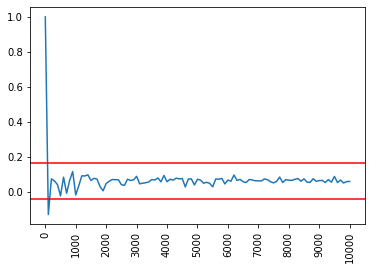

In [13]:
x = list(range(0,110,10))
labels = [i*100 for i in x]
plt.plot(games_return)
plt.axhline(y = prob_craps[7], color = 'r', linestyle = '-')
plt.axhline(y = prob_craps[5]-prob_craps[7], color = 'r', linestyle = '-')
plt.xticks(x, labels, rotation = 90)
plt.show()